In [1]:
# 영화 댓글 긍정/부정 찾기

import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
import chardet
# encoding 자동으로 감지해주는

with open('imdb_master.csv', 'rb') as f: # binary file을 read : rb
    result = chardet.detect(f.read())

df = pd.read_csv('imdb_master.csv', encoding = result['encoding'])
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [49]:
train = df.copy()

In [50]:
train.shape

(100000, 5)

In [51]:
# 필요없는 열 제거
train.drop(train.columns[[0,1,4]], axis = 1)

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
99995,"Delightfully awful! Made by David Giancola, a ...",unsup
99996,"Watching Time Chasers, it obvious that it was ...",unsup
99997,At the beginning we can see members of Troma t...,unsup
99998,"The movie was incredible, ever since I saw it ...",unsup


In [52]:
train = train.drop(train.columns[[0,1,4]], axis = 1)
train.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [53]:
train = train[train['label'] != 'unsup'] # see only neg/pos
train

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
49995,"Seeing as the vote average was pretty low, and...",pos
49996,"The plot had some wretched, unbelievable twist...",pos
49997,I am amazed at how this movie(and most others ...,pos
49998,A Christmas Together actually came before my t...,pos


In [54]:
# neg = 0, unsup, pos = 1 변환 (정수 인코딩 변환)
train.label = [(l != 'neg')*1 for l in train.label]

In [55]:
train.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [56]:
# 컬럼명 재 셋팅
d1 = train
print(d1.columns)
d1.columns = ['user_review', 'positive']
d1.head()

Index(['review', 'label'], dtype='object')


,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [89]:
d1.shape

(50000, 2)

In [90]:
# 훈련용 셋, 테스트 셋 분리(7:3 분리)

split = 0.7
d1_train = d1.sample(n= int(split*len(d1)))
d1_test = d1.drop(d1_train.index)



In [91]:
d1_train.shape

(35000, 2)

In [92]:
d1_test.shape

(15000, 2)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # 함수의 변수화
features = vectorizer.fit_transform(d1_train.user_review)
features
# training data 7만건, features 12만건

<35000x88995 sparse matrix of type '<class 'numpy.int64'>'
	with 4770019 stored elements in Compressed Sparse Row format>

In [94]:
len(vectorizer.get_feature_names()), vectorizer.get_feature_names()

(88995,
 ['00',
  '000',
  '00000000000',
  '00001',
  '000dm',
  '000s',
  '001',
  '006',
  '0069',
  '007',
  '0079',
  '007s',
  '007â',
  '0080',
  '0083',
  '009',
  '00am',
  '00o',
  '00pm',
  '00s',
  '01',
  '0148',
  '02',
  '020410',
  '029',
  '03',
  '039',
  '04',
  '044',
  '05',
  '050',
  '05nomactr',
  '06',
  '06th',
  '07',
  '07b',
  '08',
  '087',
  '089',
  '09',
  '0and',
  '0f',
  '0ne',
  '0r',
  '0s',
  '10',
  '100',
  '1000',
  '10000',
  '1000000',
  '10000000000',
  '10000000000000',
  '1000lb',
  '1000s',
  '1000th',
  '1001',
  '1004',
  '100b',
  '100bt',
  '100ft',
  '100ibs',
  '100k',
  '100miles',
  '100min',
  '100mins',
  '100s',
  '100th',
  '100times',
  '100x',
  '100â',
  '101',
  '101st',
  '102',
  '102nd',
  '103',
  '104',
  '1040s',
  '105',
  '1050',
  '105lbs',
  '106',
  '106min',
  '107',
  '108',
  '1080',
  '1080p',
  '109',
  '10_',
  '10am',
  '10ft',
  '10k',
  '10lines',
  '10min',
  '10minutes',
  '10pm',
  '10s',
  '10star',

In [95]:
# 3만건에서 100번째 칸까지 확인하기

i = 30000
j = 100

words = vectorizer.get_feature_names()[i:i+30]
pd.DataFrame(features[j:j+10, i:i+30].todense(), columns = words)

,fogy,foible,foibles,foie,foil,foiled,foiling,foils,fois,foist,...,foleying,folger,foliage,folie,folies,folk,folke,folker,folklore,folkloric
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
words

['fogy',
 'foible',
 'foibles',
 'foie',
 'foil',
 'foiled',
 'foiling',
 'foils',
 'fois',
 'foist',
 'foisted',
 'foisting',
 'fokker',
 'fola',
 'fold',
 'folded',
 'foldes',
 'folding',
 'folds',
 'foley',
 'foleying',
 'folger',
 'foliage',
 'folie',
 'folies',
 'folk',
 'folke',
 'folker',
 'folklore',
 'folkloric']

### 모델링

In [97]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(features, d1_train.positive)
# features : countervectorizer 값 (frequency 값)

MultinomialNB()

In [98]:
pred1 = model1.predict_proba(vectorizer.transform(d1_test.user_review)) # 예측한 features 값 출력
pred1

array([[1.00000000e+00, 5.58551444e-13],
       [9.52408907e-01, 4.75910926e-02],
       [9.99998494e-01, 1.50572963e-06],
       ...,
       [3.46044303e-11, 1.00000000e+00],
       [5.25112910e-03, 9.94748871e-01],
       [9.54978545e-01, 4.50214553e-02]])

In [99]:
# 결과해석
# neg = 0, pos = 1 (두 개 합치면 1)

In [100]:
pred1.shape

(15000, 2)

In [101]:
# 평가하기
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

In [102]:
def performance(y_true, pred, color = 'blue', ann = True):
    acc = accuracy_score(y_true, pred[:, 1] > 0.5 ) # 긍정일 확률 확인(0.5보다 큰지 확인)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr, tpr, color, linewidth = "3")
    xlabel('False Positive Rate')
    ylabel('True Positive Rate')
    if ann:
        annotate("Acc : %0.2f"% acc, (0.1, 0.8), size = 14)
        annotate('Auc : %0.2f'% auc, (0.1, 0.7), size = 14)

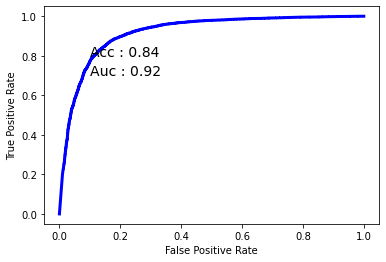

In [103]:
performance(d1_test.positive, pred1)